In [7]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from sklearn import linear_model

reg = linear_model.LinearRegression()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 타겟구하기

In [9]:
#파일 읽기
df_total= pd.read_csv('C:/Users/twentystones/Desktop/빅콘/02_평가데이터_update(210806)/지역별-월별 변수들-총합_최종_진짜_13일클러변경_클러원핫.csv', encoding='cp949')
df_total = df_total.drop('Unnamed: 0', axis=1)

In [10]:
df_total = df_total.drop(df_total[df_total['emd_nm']=='알수없음'].index, axis=0)

In [15]:
#필요없는 칼럼 지우기
data = df_total.drop(['date','emd_nm','emd_nm_num','emd_nm2','cluster1','cluster2','cluster3',
                      'month1','month2','month3','month4','month5','month6','month7','month8','month9','month10','month11','month12',], axis=1)

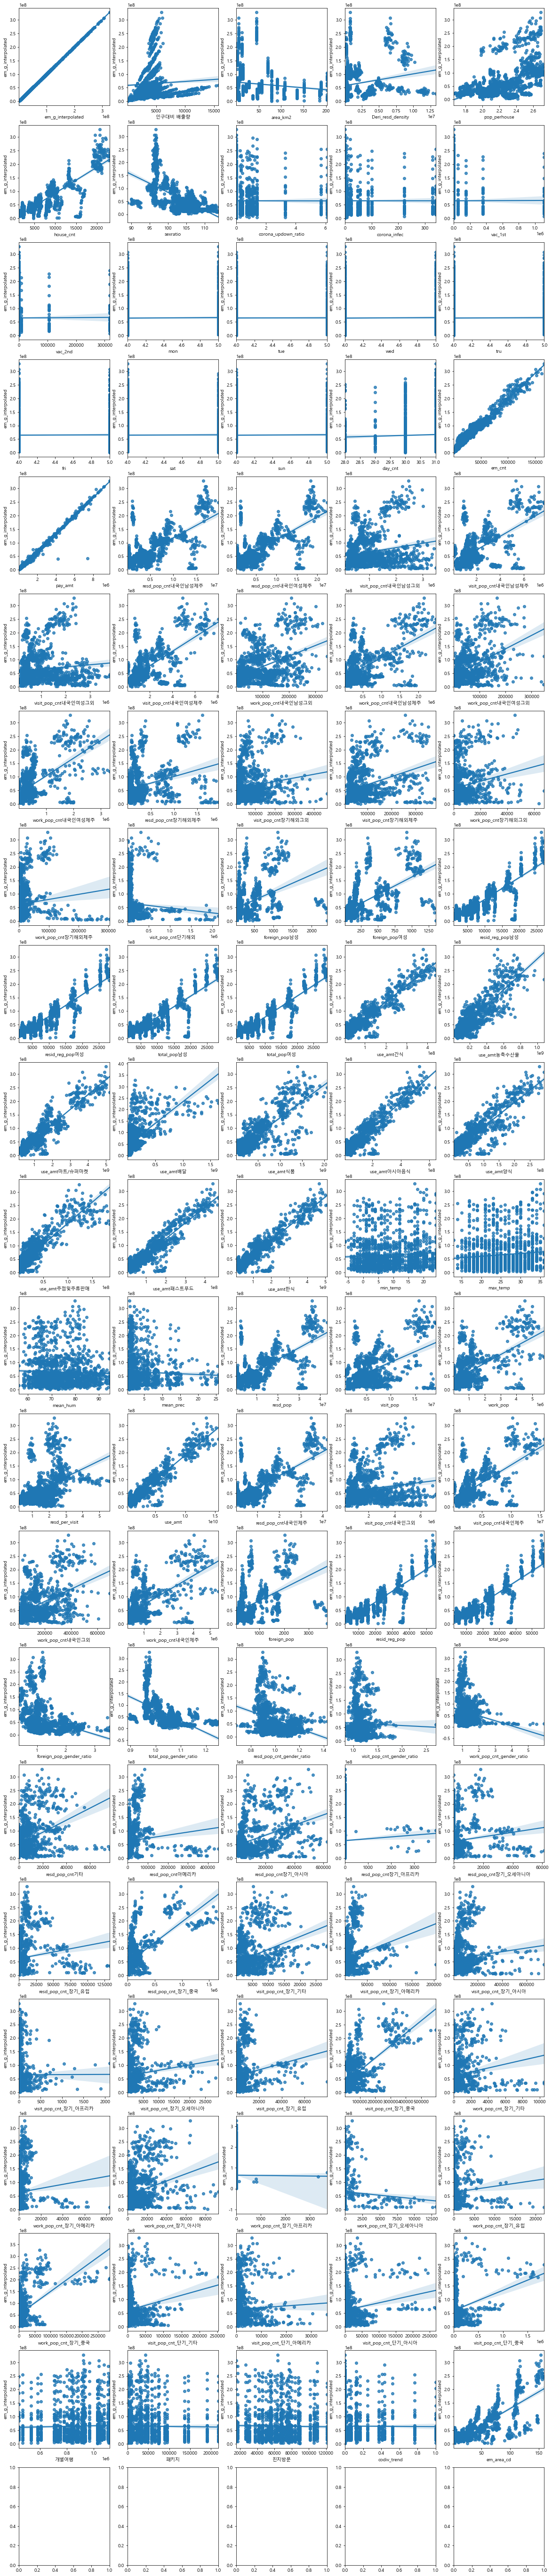

In [20]:
#data = data[data['cluster3']==1]

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

fig, axs = plt.subplots(figsize=(20,100), nrows=22, ncols=5)
x_features = data.columns.tolist()

for i, feature in enumerate(x_features):    #인덱스와 밸류 같이 가져오는 enumerate를 쓰고, i, feature 사용
    row=int(i/5)  #행번호 
    col = i%5     #열번호
    #산점도와 회귀선 시각화
    sns.regplot(x=feature, y='em_g_interpolated', data=data, ax=axs[row][col])

# 히트맵으로 그리기

In [21]:
#불러오기
merge = pd.read_csv('C:/Users/twentystones/Desktop/빅콘/02_평가데이터_update(210806)/merge2.csv', encoding='cp949', index_col=0)
merge = merge.drop(merge.index[[0,1,2,3]])
merge

delete=[]
for i in merge.columns.tolist():
    if i[:4] == 'em_g':
        delete.append(i)
merge=merge[delete]

#스케일링
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(merge)
print(fitted.data_max_)
merge_scale = min_max_scaler.transform(merge)
merge_scale = pd.DataFrame(merge_scale, columns=merge.columns, index=merge.index)

merge_scale

[2.65018400e+08 2.43744900e+08 2.68625650e+08 2.48898350e+08
 2.59232500e+08 2.72193365e+08 3.27483750e+08 3.06231800e+08
 2.59310550e+08 2.44370750e+08 2.46249750e+08 2.73200900e+08
 2.60492900e+08 2.51290500e+08 2.49789350e+08 2.37397550e+08
 2.49305400e+08 2.58025550e+08 2.95221200e+08 2.85216650e+08
 2.53510600e+08 2.23797811e+08 2.30736200e+08 2.47186350e+08
 2.34382600e+08 2.41766400e+08 2.55138700e+08 2.26073450e+08
 2.49341150e+08 2.26997876e+08 2.78924650e+08 2.90691050e+08
 2.32960150e+08 2.32088700e+08 2.31329350e+08 2.55413000e+08
 2.47444300e+08 2.27399950e+08 2.32733500e+08 2.12851000e+08
 2.27061100e+08 2.39069250e+08]


,em_g18_01,em_g18_02,em_g18_03,em_g18_04,em_g18_05,em_g18_06,em_g18_07,em_g18_08,em_g18_09,em_g18_10,em_g18_11,em_g18_12,em_g19_01,em_g19_02,em_g19_03,em_g19_04,em_g19_05,em_g19_06,em_g19_07,em_g19_08,em_g19_09,em_g19_10,em_g19_11,em_g19_12,em_g20_01,em_g20_02,em_g20_03,em_g20_04,em_g20_05,em_g20_06,em_g20_07,em_g20_08,em_g20_09,em_g20_10,em_g20_11,em_g20_12,em_g21_01,em_g21_02,em_g21_03,em_g21_04,em_g21_05,em_g21_06
건입동,0.147323,0.152582,0.146641,0.143824,0.147463,0.150992,0.150145,0.149450,0.172463,0.165617,0.153148,0.153510,0.162565,0.167789,0.152689,0.152602,0.157070,0.167646,0.173384,0.164786,0.185955,0.179999,0.175429,0.171493,0.191285,0.165583,0.145901,0.149447,0.151992,0.174421,0.161954,0.149426,0.145845,0.149397,0.147039,0.141104,0.141328,0.121610,0.138841,0.158595,0.160501,0.144929
구좌읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009122,0.043483,0.087337,0.081411,0.073674,0.082900,0.097294,0.109725,0.128649,0.134519,0.125888,0.127258,0.122272,0.098043,0.094080,0.109548,0.124753,0.147901,0.144528,0.150475
남원읍,0.134850,0.127828,0.133453,0.144922,0.138408,0.128629,0.125847,0.139451,0.154806,0.161493,0.161704,0.158425,0.157479,0.089902,0.048221,0.047630,0.157831,0.212723,0.206552,0.220316,0.224853,0.253638,0.237947,0.241846,0.291444,0.253342,0.234660,0.253431,0.243961,0.275347,0.236519,0.240123,0.236202,0.241267,0.224590,0.230703,0.222251,0.240418,0.262158,0.284575,0.257187,0.256506
노형동,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
대륜동,0.193834,0.189589,0.188089,0.198440,0.182436,0.168953,0.169508,0.176616,0.176318,0.178481,0.182670,0.177341,0.184883,0.146685,0.120581,0.113243,0.153156,0.163059,0.198035,0.200395,0.205166,0.219426,0.215406,0.220814,0.243061,0.218592,0.210275,0.214211,0.220354,0.232362,0.171775,0.160326,0.160085,0.152730,0.151853,0.158740,0.171857,0.175181,0.188030,0.201238,0.196285,0.188206
대정읍,0.121043,0.126322,0.137112,0.139645,0.141491,0.135886,0.127385,0.153628,0.176463,0.175216,0.181740,0.170238,0.214824,0.239351,0.280601,0.304662,0.339109,0.355389,0.327122,0.361070,0.199964,0.345280,0.430886,0.413458,0.442923,0.404433,0.397209,0.411570,0.434645,0.452513,0.352677,0.369601,0.392381,0.409115,0.427320,0.414232,0.420794,0.430573,0.448059,0.473394,0.497530,0.454571
대천동,0.179242,0.161037,0.160352,0.145037,0.143234,0.139208,0.136305,0.148325,0.155821,0.160228,0.157430,0.154676,0.156858,0.123341,0.096762,0.096186,0.142317,0.166708,0.202524,0.206432,0.216097,0.228624,0.228279,0.214064,0.247176,0.221300,0.215325,0.215100,0.211546,0.237278,0.198928,0.222399,0.237147,0.240381,0.243206,0.239627,0.244358,0.241102,0.248703,0.245450,0.250636,0.228020
도두동,0.027014,0.030407,0.029055,0.029640,0.030456,0.031583,0.030816,0.033843,0.041659,0.045085,0.040565,0.037813,0.040205,0.035363,0.036773,0.041085,0.037663,0.048190,0.055730,0.058630,0.071413,0.078718,0.079443,0.067206,0.077660,0.065063,0.049417,0.048526,0.053020,0.069568,0.070617,0.064575,0.064715,0.069571,0.072524,0.061088,0.064214,0.059522,0.066573,0.073206,0.078849,0.074186
동홍동,0.431278,0.451633,0.420423,0.383431,0.370171,0.364932,0.365230,0.363854,0.372093,0.378500,0.396748,0.385047,0.307811,0.211015,0.116116,0.115993,0.305183,0.390799,0.452698,0.463106,0.496042,0.508738,0.504150,0.498479,0.563209,0.505233,0.471820,0.466613,0.475388,0.535093,0.406620,0.391008,0.416135,0.396634,0.376559,0.410178,0.428894,0.450796,0.432660,0.431808,0.409134,0.356110
봉개동,0.010286,0.013470,0.008980,0.011323,0.014694,0.012782,0.015970,0.021839,0.027329,0.025655,0.026032,0.031973,0.042194,0.041160,0.038883,0.040856,0.036600,0.048138,0.055627,0.047014,0.064219,0.064119,0.062620,0.061447,0.068094,0.063310,0.048265,0.05

           애월읍       성산읍       표선면       안덕면       조천읍       구좌읍       한림읍  \
애월읍   1.000000  0.736622  0.843299  0.833963  0.980008  0.977716  0.978896   
성산읍   0.736622  1.000000  0.915817  0.934084  0.666261  0.734089  0.677811   
표선면   0.843299  0.915817  1.000000  0.945711  0.650281  0.687571  0.592052   
안덕면   0.833963  0.934084  0.945711  1.000000  0.487921  0.569022  0.495086   
조천읍   0.980008  0.666261  0.650281  0.487921  1.000000  0.973679  0.949501   
구좌읍   0.977716  0.734089  0.687571  0.569022  0.973679  1.000000  0.974187   
한림읍   0.978896  0.677811  0.592052  0.495086  0.949501  0.974187  1.000000   
한경면   0.978073  0.716823  0.695318  0.627177  0.953088  0.972360  0.953695   
영천동   0.664335  0.576934  0.559542  0.478558  0.665845  0.623521  0.627988   
효돈동   0.670814  0.458121  0.470569  0.376112  0.688710  0.669240  0.677851   
이도1동 -0.212613 -0.117750 -0.017116  0.039910 -0.587044 -0.505770 -0.530993   
삼도2동 -0.600674 -0.202544 -0.246455 -0.250341 -0.553310 -0.542377

<AxesSubplot:>

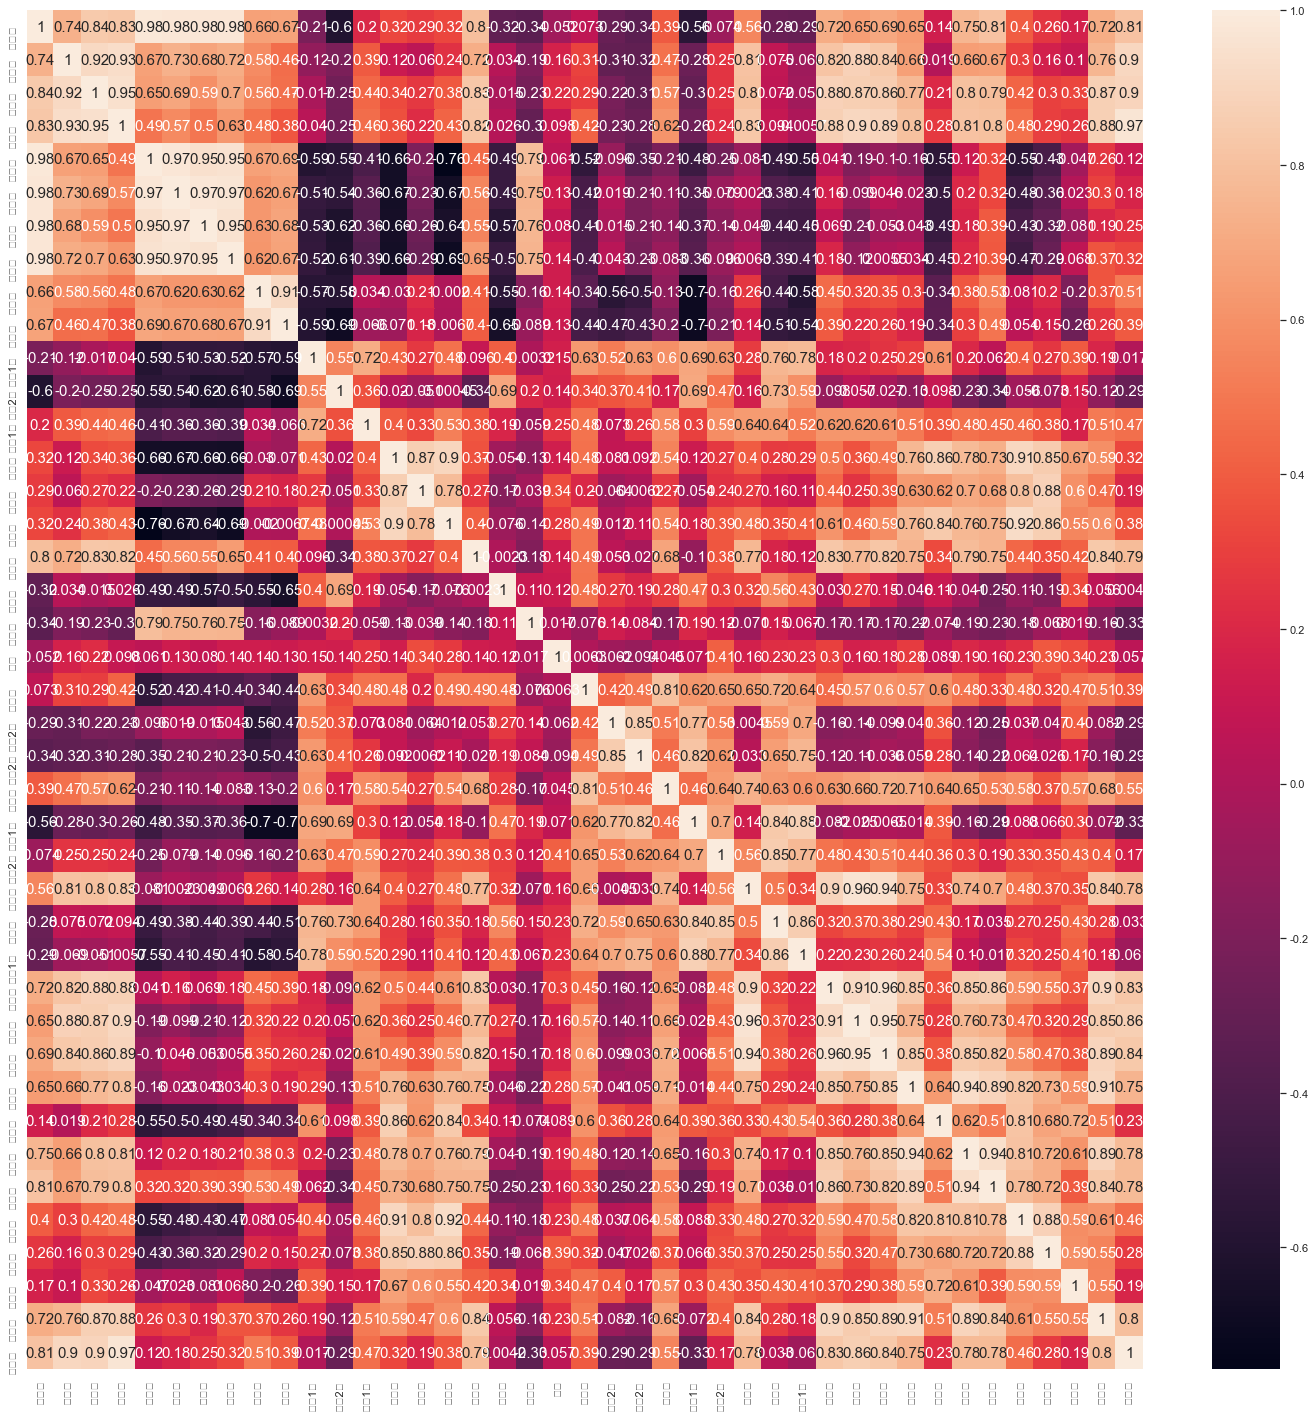

In [22]:
#칼럼명
ccol=['애월읍','성산읍','표선면','안덕면','조천읍','구좌읍','한림읍','한경면','영천동','효돈동','이도1동',
      '삼도2동','일도1동','동홍동','서홍동','중앙동','외도동','아라동','노형동','연동','삼양동','이도2동','일도2동',
      '화북동','삼도1동','용담2동','오라동','건입동','용담1동','도두동','봉개동','이호동','중문동','대륜동','남원읍','대천동',
      '천지동','정방동','송산동','예래동','대정읍']

#merge_scale을 전치함.
corrs = merge_scale.T[ccol].corr()
print(corrs)

sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(corrs, annot=True, annot_kws={'size':15})